In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn import metrics
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [2]:
dataset = pd.read_csv("C:/Users/user/Downloads/mushrooms.csv")
dataset

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,e,k,s,n,f,n,a,c,b,y,...,s,o,o,p,o,o,p,b,c,l
8120,e,x,s,n,f,n,a,c,b,y,...,s,o,o,p,n,o,p,b,v,l
8121,e,f,s,n,f,n,a,c,b,n,...,s,o,o,p,o,o,p,b,c,l
8122,p,k,y,n,f,y,f,c,n,b,...,k,w,w,p,w,o,e,w,v,l


In [3]:
dataset.isna().sum()

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

In [4]:
dataset.columns

Index(['class', 'cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
       'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
       'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
       'stalk-surface-below-ring', 'stalk-color-above-ring',
       'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number',
       'ring-type', 'spore-print-color', 'population', 'habitat'],
      dtype='object')

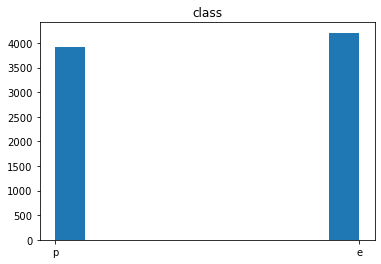

In [5]:
dataset.describe()
plt.hist(dataset['class'])
plt.title('class')
plt.show()

In [6]:
from sklearn.preprocessing import LabelEncoder
encoder =  LabelEncoder()
for i in dataset.columns:
    dataset[i]=encoder.fit_transform(dataset[i])

In [7]:
dataset

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,5,2,4,1,6,1,0,1,4,...,2,7,7,0,2,1,4,2,3,5
1,0,5,2,9,1,0,1,0,0,4,...,2,7,7,0,2,1,4,3,2,1
2,0,0,2,8,1,3,1,0,0,5,...,2,7,7,0,2,1,4,3,2,3
3,1,5,3,8,1,6,1,0,1,5,...,2,7,7,0,2,1,4,2,3,5
4,0,5,2,3,0,5,1,1,0,4,...,2,7,7,0,2,1,0,3,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,0,3,2,4,0,5,0,0,0,11,...,2,5,5,0,1,1,4,0,1,2
8120,0,5,2,4,0,5,0,0,0,11,...,2,5,5,0,0,1,4,0,4,2
8121,0,2,2,4,0,5,0,0,0,5,...,2,5,5,0,1,1,4,0,1,2
8122,1,3,3,4,0,8,1,0,1,0,...,1,7,7,0,2,1,0,7,4,2


In [8]:
X1=dataset.drop('class',axis=1)

In [9]:
Y1=dataset['class']

In [10]:
X1

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,5,2,4,1,6,1,0,1,4,0,...,2,7,7,0,2,1,4,2,3,5
1,5,2,9,1,0,1,0,0,4,0,...,2,7,7,0,2,1,4,3,2,1
2,0,2,8,1,3,1,0,0,5,0,...,2,7,7,0,2,1,4,3,2,3
3,5,3,8,1,6,1,0,1,5,0,...,2,7,7,0,2,1,4,2,3,5
4,5,2,3,0,5,1,1,0,4,1,...,2,7,7,0,2,1,0,3,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,3,2,4,0,5,0,0,0,11,0,...,2,5,5,0,1,1,4,0,1,2
8120,5,2,4,0,5,0,0,0,11,0,...,2,5,5,0,0,1,4,0,4,2
8121,2,2,4,0,5,0,0,0,5,0,...,2,5,5,0,1,1,4,0,1,2
8122,3,3,4,0,8,1,0,1,0,1,...,1,7,7,0,2,1,0,7,4,2


In [11]:
Y1

0       1
1       0
2       0
3       1
4       0
       ..
8119    0
8120    0
8121    0
8122    1
8123    0
Name: class, Length: 8124, dtype: int32

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X1, Y1,test_size=0.25,random_state=42)

In [13]:
X_train = X_train.to_numpy()
y_train = y_train.to_numpy()
X_test = X_test.to_numpy()
y_test = y_test.to_numpy()

In [14]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential()
model.add(Dense(64, activation = 'relu', input_shape = (22,)))
model.add(Dense(32, activation = 'relu'))
model.add(Dense(16, activation = 'relu'))
model.add(Dense(1))
model.compile(optimizer = 'rmsprop', loss = 'mse', metrics = ['mse'])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                1472      
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 16)                528       
                                                                 
 dense_3 (Dense)             (None, 1)                 17        
                                                                 
Total params: 4,097
Trainable params: 4,097
Non-trainable params: 0
_________________________________________________________________


In [15]:
N_EPOCHS = 100
history = model.fit(X_train, y_train, epochs = N_EPOCHS, validation_data=(X_test, y_test))

Epoch 1/100
191/191 [==============================] - 1s 3ms/step - loss: 0.1210 - mse: 0.1210 - val_loss: 0.0529 - val_mse: 0.0529
Epoch 2/100
191/191 [==============================] - 0s 2ms/step - loss: 0.0386 - mse: 0.0386 - val_loss: 0.0387 - val_mse: 0.0387
Epoch 3/100
191/191 [==============================] - 0s 2ms/step - loss: 0.0226 - mse: 0.0226 - val_loss: 0.0156 - val_mse: 0.0156
Epoch 4/100
191/191 [==============================] - 0s 2ms/step - loss: 0.0153 - mse: 0.0153 - val_loss: 0.0133 - val_mse: 0.0133
Epoch 5/100
191/191 [==============================] - 0s 2ms/step - loss: 0.0123 - mse: 0.0123 - val_loss: 0.0101 - val_mse: 0.0101
Epoch 6/100
191/191 [==============================] - 0s 2ms/step - loss: 0.0096 - mse: 0.0096 - val_loss: 0.0068 - val_mse: 0.0068
Epoch 7/100
191/191 [==============================] - 0s 2ms/step - loss: 0.0077 - mse: 0.0077 - val_loss: 0.0080 - val_mse: 0.0080
Epoch 8/100
191/191 [==============================] - 0s 2ms/step - 

Epoch 59/100
191/191 [==============================] - 0s 2ms/step - loss: 3.8529e-04 - mse: 3.8529e-04 - val_loss: 0.0012 - val_mse: 0.0012
Epoch 60/100
191/191 [==============================] - 0s 2ms/step - loss: 3.7152e-04 - mse: 3.7152e-04 - val_loss: 7.0558e-04 - val_mse: 7.0558e-04
Epoch 61/100
191/191 [==============================] - 0s 2ms/step - loss: 3.8358e-04 - mse: 3.8358e-04 - val_loss: 4.8997e-04 - val_mse: 4.8997e-04
Epoch 62/100
191/191 [==============================] - 0s 2ms/step - loss: 3.9398e-04 - mse: 3.9398e-04 - val_loss: 1.9975e-04 - val_mse: 1.9975e-04
Epoch 63/100
191/191 [==============================] - 0s 2ms/step - loss: 3.6371e-04 - mse: 3.6371e-04 - val_loss: 2.4040e-04 - val_mse: 2.4040e-04
Epoch 64/100
191/191 [==============================] - 0s 2ms/step - loss: 3.5551e-04 - mse: 3.5551e-04 - val_loss: 2.1721e-04 - val_mse: 2.1721e-04
Epoch 65/100
191/191 [==============================] - 0s 2ms/step - loss: 3.4934e-04 - mse: 3.4934e-04 - v

In [16]:
model.evaluate(X_test, y_test)

64/64 [==============================] - 0s 1ms/step - loss: 9.5691e-05 - mse: 9.5691e-05


[9.569139365339652e-05, 9.569139365339652e-05]

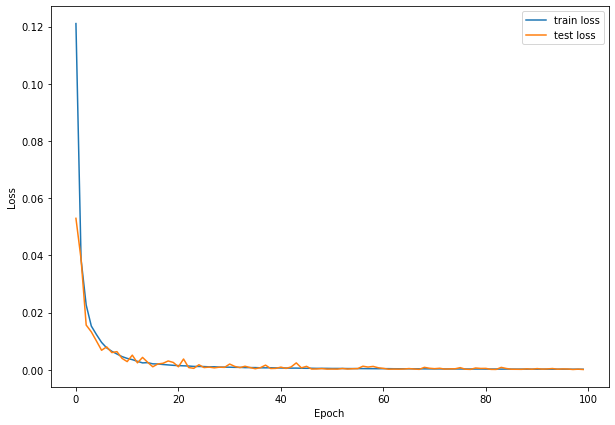

In [17]:
# loss 체크
import matplotlib.pyplot as plt
plt.figure(figsize=(10,7))
plt.plot(range(N_EPOCHS), history.history['loss'], label='train loss')
plt.plot(range(N_EPOCHS), history.history['val_loss'], label='test loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

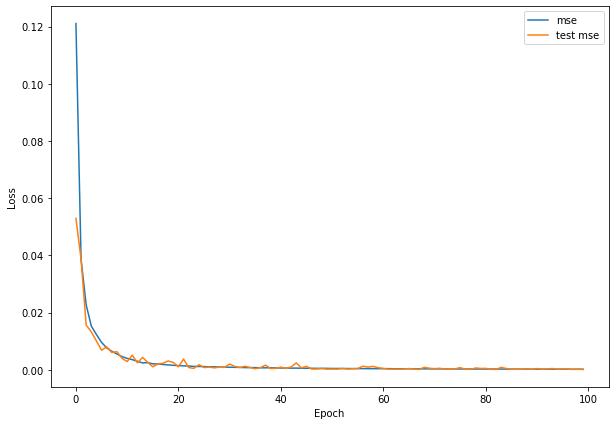

In [18]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,7))
plt.plot(range(N_EPOCHS), history.history['mse'], label='mse')
plt.plot(range(N_EPOCHS), history.history['val_mse'], label='test mse')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()